# 필요한 라이브러리 설치

In [254]:
# 필요한 라이브러리 설치
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import sklearn
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
import missingno as msno
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
import copy

# 데이터 불러오기

In [255]:
# 파일 받아오기
df1 =pd.read_csv("Mdf_1year.csv")
df2 =pd.read_csv("Mdf_2year.csv")
df3 =pd.read_csv("Mdf_3year.csv")
df4 =pd.read_csv("Mdf_4year.csv")
df5 =pd.read_csv("Mdf_5year.csv")

# list화

In [256]:
df_list = [df1, df2, df3, df4, df5]

# Train, Test 셋 나누기

In [257]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
df_x, df_y = ([],[])
for i in range(0,5):
    x = df_list[i].drop(labels=['bankruptcy'], axis=1)
    y = df_list[i]['bankruptcy'].to_frame()
    df_x.append(x)
    df_y.append(y)

x_train, x_test, y_train, y_test = [], [], [], []
for i in range(5):
    x_train_i, x_test_i, y_train_i, y_test_i = train_test_split(df_x[i], df_y[i], test_size=0.3,random_state=2022)
    x_train.append(x_train_i)
    x_test.append(x_test_i)
    y_train.append(y_train_i)
    y_test.append(y_test_i)

# Oversampling 진행 (+ X,Y나누기)

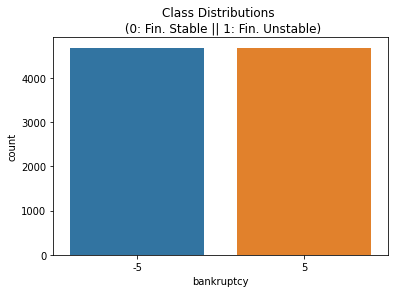

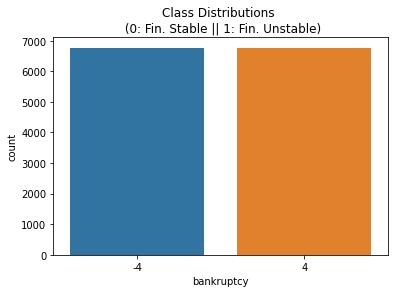

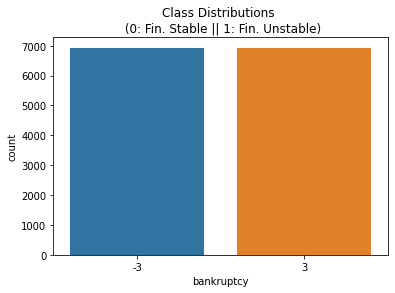

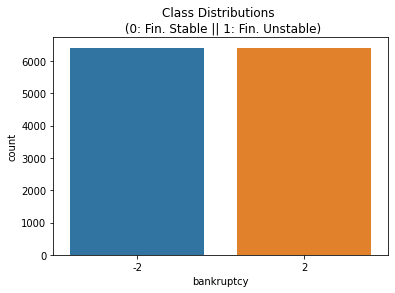

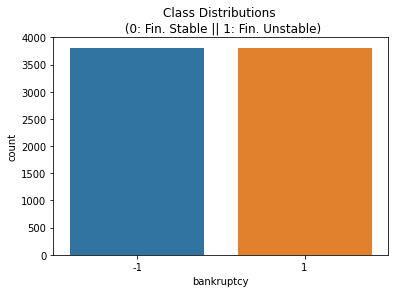

In [259]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
y = []
for i in range(5):
    x_train[i], y_train[i] = smote.fit_resample(x_train[i], y_train[i])
    sns.countplot(x= y_train[i]['bankruptcy'])
    plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')
    y.append(y_train[i])
    plt.show()

# 모델 구축 ( 모델 이름 )

In [261]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth = 12,random_state=256)

#for i in range(5):
   # model = forest.fit(x_train[i], y_train[i])
   # forest_model.append(model)

# 성능 지표 확인 ( + Confusion Matrix )

In [208]:
model.predict(x_train[4].iloc[[5]])

array([1], dtype=int64)

In [262]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가

forest_model = []

for i in range(0,5):
    model_ = forest.fit(x_train[i], y_train[i])
    model = copy.deepcopy(model_)
    y_pred = model.predict(x_test[i])
    print(i+1,'years_model')
    print("Train_Accuracy : ", model.score(x_train[i], y_train[i]))
    print("Test_Accuracy : ", model.score(x_test[i], y_test[i]), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
    accuracy = mt.accuracy_score(y_test[i], y_pred)
    recall = mt.recall_score(y_test[i], y_pred,average='micro')
    precision = mt.precision_score(y_test[i], y_pred,average='micro')
    f1_score = mt.f1_score(y_test[i], y_pred,average='micro')
    matrix = mt.confusion_matrix(y_test[i], y_pred)
    print(y_pred)
    print('Accuracy: ', format(accuracy,'.2f'))
    print('Recall: ', format(recall,'.2f'))
    print('Precision: ', format(precision,'.2f'))
    print('F1_score: ', format(f1_score,'.2f'))
    print('Confusion Matrix:','\n', matrix,'\n\n')
    forest_model.append(model)

1 years_model
Train_Accuracy :  0.9995731967562953
Test_Accuracy :  0.9610576923076923 

[-5 -5 -5 ... -5 -5 -5]
Accuracy:  0.96
Recall:  0.96
Precision:  0.96
F1_score:  0.96
Confusion Matrix: 
 [[1959   27]
 [  54   40]] 


2 years_model
Train_Accuracy :  0.9971200708905626
Test_Accuracy :  0.9543348775645268 

[-4 -4 -4 ... -4 -4 -4]
Accuracy:  0.95
Recall:  0.95
Precision:  0.95
F1_score:  0.95
Confusion Matrix: 
 [[2839   73]
 [  65   45]] 


3 years_model
Train_Accuracy :  0.9937274693583273
Test_Accuracy :  0.9324151185137732 

[-3 -3 -3 ... -3 -3 -3]
Accuracy:  0.93
Recall:  0.93
Precision:  0.93
F1_score:  0.93
Confusion Matrix: 
 [[2855  131]
 [  80   56]] 


4 years_model
Train_Accuracy :  0.992126598066729
Test_Accuracy :  0.936426116838488 

[-2 -2 -2 ... -2 -2 -2]
Accuracy:  0.94
Recall:  0.94
Precision:  0.94
F1_score:  0.94
Confusion Matrix: 
 [[2653  128]
 [  57   72]] 


5 years_model
Train_Accuracy :  0.9933088428234059
Test_Accuracy :  0.9315068493150684 

[-1 -1 -1

# 조건문을 통해 데이터 분류 진행

In [311]:
unseen = pd.read_csv("Mdf_unseen_10label.csv")
for i in list([-5,-4,-3,-2,-1]):
    drop = unseen[ unseen['bankruptcy'] == i ].index
    unseen.drop(drop , inplace=True)
unseen = unseen.reset_index(drop = True)
def predict_venture(df, sample_number = 0):
    if sample_num ==0:
        Us_x = df.drop(labels=['bankruptcy'], axis=1)
        Us_y = df['bankruptcy'].to_frame()
        
    else:
        sample_index = np.random.choice(df.shape[0], sample_number)
        sample_data = df.loc[sample_index]
        Us_x = sample_data.drop(labels=['bankruptcy'], axis=1)
        Us_y = sample_data['bankruptcy'].to_frame()
    uy=Us_y['bankruptcy']
    
    for j in range(len(Us_x)):
        add = True
        if uy.iloc[j]>0:
            print(f'해당 샘플은 {abs(uy.iloc[j])}년 후 파산 데이터 입니다.')
        else:
            print(f'해당 샘플은 {abs(uy.iloc[j])}년 후 파산하지 않은 데이터 입니다.')
        y_pred_before = 0
        pred_list = []
        for i in range(4,-1,-1):
            y_pred = forest_model[i].predict(Us_x.iloc[[j]])
            pred_list.append(copy.deepcopy(y_pred))
            if abs(uy.iloc[j]) + i>=5 :
                if y_pred > 0:
                    print(f'{5-i}년 후 예측 모델은 {5-i}년 후 Bankruptcy라고 예측했습니다.')
                    answer = False
                else:
                    print(f'{5-i}년 후 예측 모델은 {5-i}년 후 No Bankruptcy라고 예측했습니다.')
                    answer = True
                    y_pred_before = y_pred
            else:
                if answer:
                    if y_pred_before != uy.iloc[j]:
                        print('모델의 오분류입니다.')
                        break
                    if add: 
                        print('=================추가 예측================')
                        add =False
                    if y_pred > 0:
                        print(f'{5-i}년 후 예측 모델은 {5-i}년 후 Bankruptcy라고 예측했습니다.')
                    else:
                        print(f'{5-i}년 후 예측 모델은 {5-i}년 후 No Bankruptcy라고 예측했습니다.')
            if abs(uy.iloc[j])== 5 and i==0:
                if y_pred != uy.iloc[j]:
                    print('모델의 오분류입니다.')
                
        print('\n')    
            
predict_venture(unseen, 3)

해당 샘플은 3년 후 파산 데이터 입니다.
1년 후 예측 모델은 1년 후 No Bankruptcy라고 예측했습니다.
2년 후 예측 모델은 2년 후 Bankruptcy라고 예측했습니다.
3년 후 예측 모델은 3년 후 Bankruptcy라고 예측했습니다.


해당 샘플은 2년 후 파산 데이터 입니다.
1년 후 예측 모델은 1년 후 Bankruptcy라고 예측했습니다.
2년 후 예측 모델은 2년 후 Bankruptcy라고 예측했습니다.


해당 샘플은 4년 후 파산 데이터 입니다.
1년 후 예측 모델은 1년 후 No Bankruptcy라고 예측했습니다.
2년 후 예측 모델은 2년 후 Bankruptcy라고 예측했습니다.
3년 후 예측 모델은 3년 후 Bankruptcy라고 예측했습니다.
4년 후 예측 모델은 4년 후 Bankruptcy라고 예측했습니다.


